#  Prediction Model

> **Course**: Data Mining

> **Author**: Enes Kemal 

> **  Date**: 05/02/2017




Step 0: Data Preparation and Cleaning 
---

In [1]:
import pandas as pd

In [2]:
# Read CSV data into df
df = pd.read_csv('./eneskemal_PredModel.csv')
# delete id column no need
df.drop('id',axis=1,inplace=True)
# delete unnamed colum at the end
df.drop('Unnamed: 32',axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Learn the unique values in diagnosis column
df.diagnosis.unique() 
# M: Malign (Yes Cancer)
# B: Benign (No Cancer)
# I can also map M and B as 1 and 0 for more numerical 
#  approach
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

Step 1: Data Information and Descriptive Statistics
---
Generate the information about your dataset: number of columns and rows, names and data types of the columns, memory usage of the dataset. 

> Hint: Pandas data frame info() function.

Generate descriptive statistics of all columns (input and output) of your dataset. Descriptive statistics for numerical columns include: count, mean, std, min, 25 percentile (Q1), 50 percentile (Q2, median), 75 percentile (Q3), max values of the columns. For categorical columns, determine distinct values and their frequency in each categorical column. 

> Hint: Pandas, data frame describe() function.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [5]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Step 2: Train Test Split
---

Split your data into Training and Test data set by randomly selecting; use 70% for training and 30 % for testing. Generate descriptive statistics of all columns (input and output) of Training and Test datasets. Review the descriptive statistics of input output columns in Train, Test and original Full (before the splitting operation) datasets and compare them to each other. Are they similar or not? Do you think Train and Test dataset are representative of the Full datasets ? why ? 

> Hint: Scikit learn, data train_test_split(), stratified function.

In [6]:
df["diagnosis"].value_counts(df["diagnosis"].unique()[0])

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

In [7]:
# Splitting train and test data
# .7 and .3 
import numpy as np # Linear algebra and numerical apps
msk = np.random.rand(len(df)) < 0.7
train_df = df[msk]
test_df = df[~msk]

Step 3: Analysis of the Output Column
---

Analyze the output columns in Train and Test dataset. If the output column is numerical then calculate the IQR (inter quartile range, Q3-Q1) and Range (difference between max and min value). If your output column is categorical then determine if the column is nominal or ordinal, why?. Is there a class imbalance problem? (check if there is big difference between the number of distinct values in your categorical output column)

In [8]:
print(train_df["diagnosis"].value_counts(train_df["diagnosis"].unique()[0]))
print(len(train_df))
train_df.head()

0    0.626263
1    0.373737
Name: diagnosis, dtype: float64
396


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
print(test_df["diagnosis"].value_counts(test_df["diagnosis"].unique()[0]))
print(len(test_df))
test_df.head()

0    0.630058
1    0.369942
Name: diagnosis, dtype: float64
173


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
12,1,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,20.96,29.94,151.7,1332.0,0.1037,0.3903,0.3639,0.17670,0.3176,0.10230
16,1,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,...,19.07,30.88,123.4,1138.0,0.1464,0.1871,0.2914,0.16090,0.3029,0.08216
22,1,15.34,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,...,18.07,19.08,125.1,980.9,0.1390,0.5954,0.6305,0.23930,0.4667,0.09946


**Our output/classification label is diagnosis(M/B), which is nominal categorical data.**

> The ratios between Benign and Malignant outputs in train and test
are pretty similar to what we had  in the full data. 

Step 4: Scale Training and Test Dataset
---

Using one of the scaling method (max, min-max, standard or robust), create a scaler object and scale the numerical input columns of the Training dataset. Using the same scaler object, scale the numerical input columns of the Test set. Generate the descriptive statistics of the scaled input columns of Training and Test set.

If some of the input columns are categorical then convert them to binary columns using one-hotencoder() function (scikit learn) or dummy() function (Pandas data frame). 

> Hint: http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing


In [10]:
# I am going to apply min-max scaling for my data.
from sklearn import preprocessing
# Fitting the minmax scaled version for training data
minmax_scale = preprocessing.MinMaxScaler().fit(train_df.iloc[:, 1:])
# Now actually scale train and test data
train_df.iloc[:, 1:] = minmax_scale.transform(train_df.iloc[:, 1:])
test_df.iloc[:, 1:] = minmax_scale.transform(test_df.iloc[:, 1:])

/home/eneskemal/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
train_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.522023,0.027801,0.537385,0.356389,0.553970,0.792037,0.703799,0.768949,0.686364,...,0.610409,0.141525,0.661431,0.445464,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.652795,0.334440,0.610277,0.495838,0.220339,0.181768,0.203799,0.366806,0.379798,...,0.596155,0.303571,0.530273,0.429833,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.608191,0.478838,0.589348,0.443062,0.466746,0.431017,0.462946,0.668583,0.509596,...,0.544258,0.360075,0.498246,0.368549,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.189011,0.442739,0.211028,0.092551,0.792844,0.811361,0.566135,0.549922,0.776263,...,0.227761,0.385928,0.225611,0.085376,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.638603,0.192116,0.626155,0.483395,0.374566,0.347893,0.464353,0.545217,0.378283,...,0.506615,0.123934,0.496721,0.335302,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [12]:
test_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
7,1,0.305084,0.461411,0.302107,0.174848,0.558926,0.445126,0.219653,0.312859,0.573737,...,0.306337,0.429638,0.285242,0.167080,0.622268,0.330753,0.213898,0.534708,0.321506,0.393939
10,1,0.422170,0.561411,0.392321,0.269201,0.193775,0.145114,0.077369,0.173706,0.236364,...,0.384182,0.582623,0.352346,0.229853,0.309912,0.124002,0.116534,0.342784,0.272620,0.193362
12,1,0.581834,0.626141,0.606669,0.408736,0.345822,0.694497,0.484287,0.584422,0.675253,...,0.448871,0.477612,0.494179,0.275010,0.214819,0.352194,0.290655,0.607216,0.317564,0.309983
16,1,0.354250,0.432365,0.334873,0.220587,0.358410,0.161401,0.173429,0.274909,0.265657,...,0.379797,0.502665,0.350313,0.226876,0.496797,0.155048,0.232748,0.552921,0.288587,0.177883
22,1,0.387703,0.188797,0.390878,0.229126,0.443949,0.595424,0.487101,0.509984,0.737879,...,0.343250,0.188166,0.358955,0.187897,0.447930,0.551183,0.503594,0.822337,0.611473,0.291355


Step 5: Build Predictive Model
---
Using one of the methods (K-Nearest Neighbor, Naïve Bayes, Neural Network, Support Vector Machines, Decision Tree), build your predictive model using the scaled input columns of Training set. You can use any value for the model parameters, or use the default values. In building your model, use k-fold crossvalidation. 

> Hint: 
- http://scikit-learn.org/stable/supervised_learning.html#supervised-learning , 
- http://scikit-learn.org/stable/modules/cross_validation.html


In [13]:
# Input and Output
inp_train = train_df.iloc[:, 1:] 
out_train = train_df["diagnosis"]
inp_test = test_df.iloc[:, 1:] 
out_test = test_df["diagnosis"]

In [14]:
# Naive Bayes:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
nb_model = GaussianNB() 
out_test_pred = nb_model.fit(inp_train, out_train).predict(inp_test)

# Cross validation score of my model
nb_model_scores = cross_val_score(nb_model, inp_train, out_train, cv=10, scoring='accuracy')
print(nb_model_scores)

[ 0.95        0.9         0.9         0.875       0.975       0.95        0.975
  0.975       0.97368421  0.97368421]


Step 6. Model Predictions on Training Dataset
---

Apply your model to input (scaled) columns of Training dataset to obtain the predicted output for Training dataset. If your model is regression then plot actual output versus predicted output column of Training dataset. If your model is classification then generate confusion matrix on actual and predicted columns of Training dataset. 

> Hint: Matplotlip, Seaborn, Bokeh scatter(), plot() functions
- http://scikit-learn.org/0.15/auto_examples/plot_confusion_matrix.html
- http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

[[108   1]
 [  8  56]]


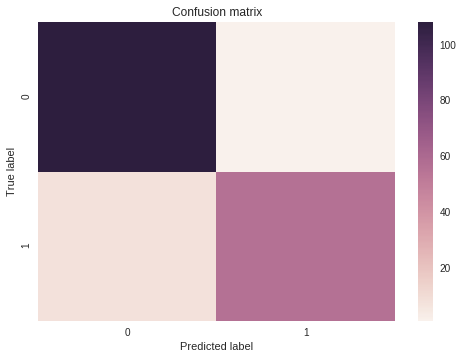

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
# Compute confusion matrix
cm = confusion_matrix(out_test, out_test_pred)

print(cm)

# Show confusion matrix in a separate window
sns.heatmap(cm)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Step 7. Model Predictions on Test Dataset
---
Apply your model to input (scaled) columns of Test dataset to obtain the predicted output for Test dataset. If your model is regression then plot actual output versus predicted output column of Test dataset. If your model is classification then generate confusion matrix on actual and predicted columns of Test dataset. 

> Hint: Matplotlip, Seaborn, Bokeh scatter(), plot() functions
- http://scikit-learn.org/0.15/auto_examples/plot_confusion_matrix.html
- http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

[[108   1]
 [  8  56]]


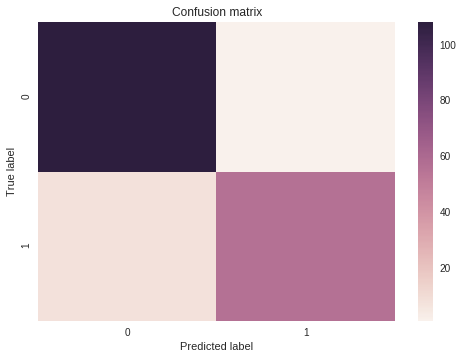

In [16]:
cm = confusion_matrix(out_test, out_test_pred)

print(cm)

# Show confusion matrix in a separate window
sns.heatmap(cm)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Step 8. Model Performance
---
Using one of the error (evaluation) metrics (classification or regression), calculate the performance of the model on Training set and Test set. Compare the performance of the model on Training and Test set. Which one (Training or Testing performance) is better, is there an overfitting case, why ?. Would you deploy (Productionize) this model for using in actual usage in your business system? why ? 

**Classification Metrics: Accuracy, Precision, Recall, F-score, Recall, AUC, ROC etc Regression Metrics: RMSE, MSE, MAE, R2 etc**

- http://scikit-learn.org/stable/model_selection.html#model-selection
- http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report

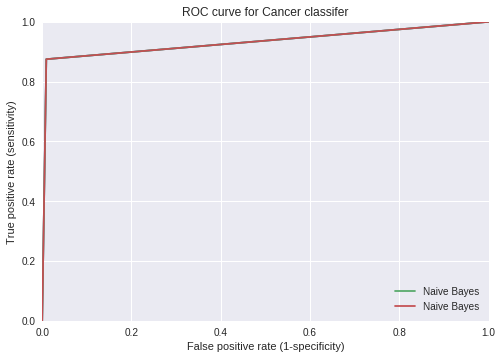

In [20]:
# I would like to use ROC
# Area under ROC Curve (or AUC for short) is 
#  a performance metric for binary classification problems.
from sklearn.metrics import roc_curve
fpr, tpr,thresholds = roc_curve(out_test, out_test_pred)
plt.plot(fpr,tpr, label="Naive Bayes")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for Cancer classifer')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc=4,)
plt.show()

Step 9. Update the Model
---
Go back to Step5, and choose different values of the model parameters and re-train the model. Repeat Steps: 6 and 7. Using the same error metric, generate the accuracy of the model on Training and Test dataset. Did you get a better performance on Training or Test set? Explain why the new model performs better or worse than the former model.

Step 10. Change the Error Metric
---
Choose another error metric other than you used in Step 8 and evaluate the performance of the model on Training and Test dataset by generating the accuracy of the model based on the new metric. Compare the results and explain which error metric is better for your modeling and why?